# Has social media influenced Spanish society's opinion on feminism or antifeminism?

In [28]:
# # TO INSTALL
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !pip install pandas openpyxl

In [8]:
import pandas as pd
import re

## Influencers initial dataset

In [9]:
path_file_influencers = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\Feminism_Influencers_Spain\data\Influencers Initial Dataset.xlsx"

df_influencers = pd.read_excel(path_file_influencers)

df_influencers.head()

,id,influencer's name,real name,age,ref. edad,education,ref. educacion,previous_occupation,ref. ocupacion,main platform,secondary platform,# follower,link_plataforma
0,1,Ibai Llanos,Ibai Llanos Garatea,28,Ibai Llanos - Wikiwand,4,https://www.wikiwand.com/es/Ibai_Llanos,Narrador esports,▷ Ibai Llanos Wiki ≫ Biografía de este Influen...,Twitch,Youtube,"12,8M",ibai - Twitch
1,2,Maria Pombo,María Pombo,28,https://www.modelocurriculum.net/biografias/in...,4,https://www.modelocurriculum.net/biografias/in...,NaN,NaN,Instagram,NaN,"2,9M",https://www.instagram.com/mariapombo/
2,3,Naim Darrechi,Naim Darrechi,20,https://historia-biografia.com/naim-darrechi/,NaN,NaN,-,-,TikTok,Instagram,29M,https://www.tiktok.com/@naimdarrechi?lang=es
3,4,Jordi Wild,Jordi Carrillo de Albornoz Torres,38,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,6,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,-,NaN,YouTube,Twitter,"3,59M",The Wild Project - YouTube
4,5,Iker Unzu,Iker Unzueta Ramos,18,"Iker Unzu - Edad, Familia, Biografía | Famous ...",3,Iker Unzu | Wiki YouTube Pedia | Fandom,-,-,TikTok,YouTube,"11,4M",Iker Unzu (@ikerunzu) oficial | TikTok


In [10]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26 non-null     int64 
 1   influencer's name    26 non-null     object
 2   real name            26 non-null     object
 3   age                  26 non-null     int64 
 4   ref. edad            25 non-null     object
 5   education            23 non-null     object
 6   ref. educacion       23 non-null     object
 7   previous_occupation  25 non-null     object
 8   ref. ocupacion       24 non-null     object
 9   main platform        26 non-null     object
 10  secondary platform   24 non-null     object
 11  # follower           26 non-null     object
 12  link_plataforma      25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.8+ KB


In [11]:
df_influencers.shape

(26, 13)

In [12]:
df_influencers.isna().sum() 

id                     0
influencer's name      0
real name              0
age                    0
ref. edad              1
education              3
ref. educacion         3
previous_occupation    1
ref. ocupacion         2
main platform          0
secondary platform     2
# follower             0
link_plataforma        1
dtype: int64

In [13]:
#remove columns 

df_influencers = df_influencers.drop(['id','real name', 'ref. edad', 'education','ref. educacion', 'previous_occupation', 'ref. ocupacion','link_plataforma'], axis = 1) 

In [14]:
df_influencers.rename(columns={'# follower': 'followers'}, inplace=True) 

In [15]:
df_influencers['followers'].head() #I am going to do a simple process in which I transform objects to numbers using "apply" and "lamda" functions

0    12,8M
1     2,9M
2      29M
3    3,59M
4    11,4M
Name: followers, dtype: object

In [16]:
df_influencers['followers'] = df_influencers['followers'].apply(lambda x: float(x.replace('M', '').replace('K', '').replace(',', '.')) * 1e6)

# df['followers'].str.replace("M","")
# df['followers'].str.replace("K","")
# pd.to_numeric(df['followers']) cuando de error, mirarlo y to_numeric dice qué caracter

In [24]:
df_influencers['followers'].head()  #this is just the "sanity checking"

0    12800000.0
1     2900000.0
2    29000000.0
3     3590000.0
4    11400000.0
Name: followers, dtype: float64

In [18]:
df_influencers 

# at this point I am able to see what I want to analize, At this point, 
# I can see the structure of the df_influencers dataset and focus on the aspects I want to analyze, this leads us to the visual inssigths:

,influencer's name,age,main platform,secondary platform,followers
0,Ibai Llanos,28,Twitch,Youtube,12800000.0
1,Maria Pombo,28,Instagram,NaN,2900000.0
2,Naim Darrechi,20,TikTok,Instagram,29000000.0
3,Jordi Wild,38,YouTube,Twitter,3590000.0
4,Iker Unzu,18,TikTok,YouTube,11400000.0
5,ElRubius,33,YouTube,Twitch,40400000.0
6,Samantha Hudosn,23,Instagram,Twitter,308000000.0
7,Roma Gallardo,34,YouTube,Twitter,1750000.0
8,DalasReview,26,YouTube,Twitter,10500000.0
9,Sindy Takanashi,30,Instagram,NaN,264000000.0


In [19]:
df_influencers['age'].describe() #about numerical data in dataframe

count    26.000000
mean     29.807692
std       6.026735
min      18.000000
25%      26.500000
50%      29.500000
75%      33.000000
max      45.000000
Name: age, dtype: float64

In [20]:
df_influencers.describe(exclude='number')

,influencer's name,main platform,secondary platform
count,26,26,24
unique,26,4,6
top,Ibai Llanos,YouTube,Twitter
freq,1,12,8


### Visual Insights

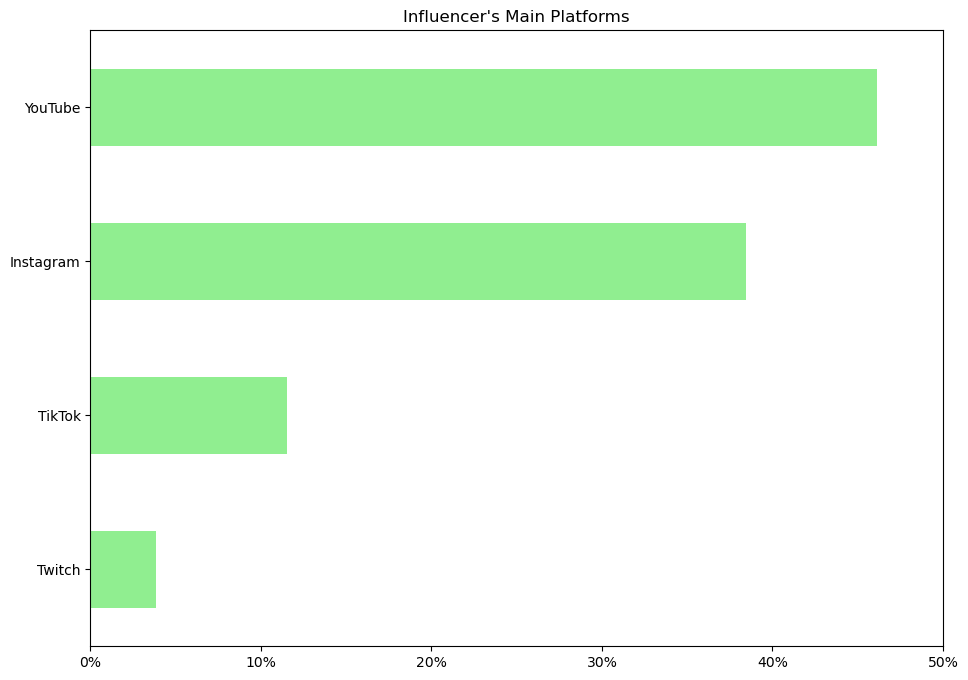

In [27]:
import matplotlib.pyplot as plt

# Bar chart for Influencers' Main Platforms

plt.figure(figsize=(11, 8))
value_counts = df_influencers['main platform'].value_counts(ascending=True, normalize=True) * 100  # Convertir a porcentaje
ax = value_counts.plot(kind='barh', color='lightgreen')


plt.title("Influencer's Main Platforms")
plt.ylabel('')

plt.xlim(0, 50) 

# Ticks for X axis
ax.set_xticks(range(0, 51, 10))  
ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])  # Format the ticks as percentages

plt.show()

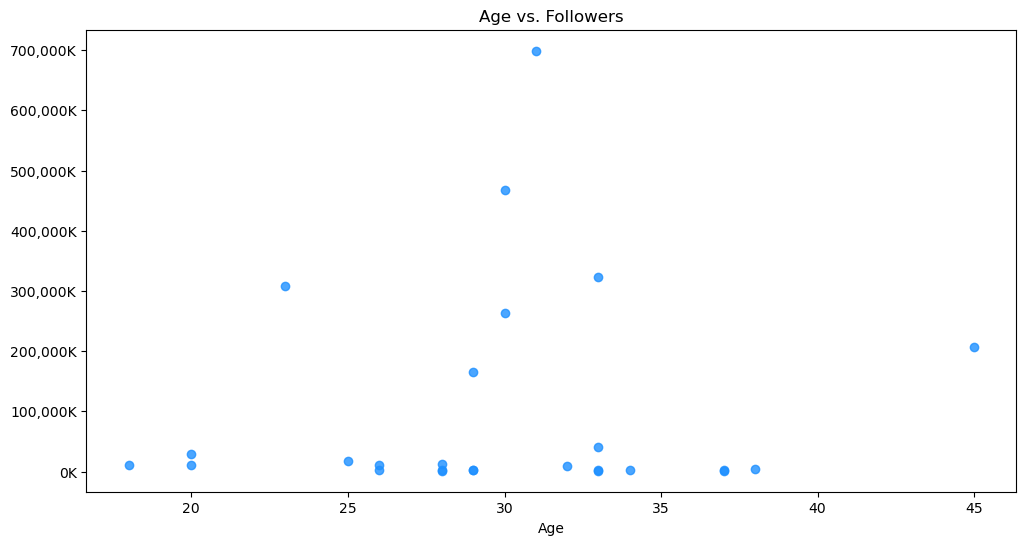

In [22]:
import matplotlib.ticker as ticker

# Scatterplot age vs. follower
plt.figure(figsize=(12, 6))
plt.scatter(df_influencers['age'], df_influencers['followers']/1000, color='dodgerblue', alpha=0.8)
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('')

ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K'))  # formato sin notación científica, 
plt.show()

In [23]:
import seaborn as sns
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_influencers['age'], df_influencers['followers'])
print(f'Correlation between age and number of followers: {correlation:.2f}')

print(f'p-value: {p_value:.3f}') 

Correlation between age and number of followers: 0.09
p-value: 0.655
